# Preparing the input data

In [1]:
from tensorflow.keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


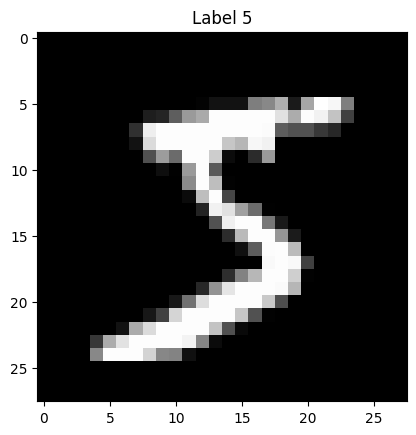

In [6]:
import matplotlib.pyplot as plt

IDX=0
plt.imshow(x_train[IDX], cmap='gray')
plt.title("Label " + str(y_train[IDX]))
plt.show()

## Normalizing the data using standardization

In [65]:
x_mean = x_train.mean()
x_std = x_train.std()
x_train_norm = (x_train - x_mean) / x_std

In [66]:
x_test_norm = (x_test - x_mean) / x_std

Normalisation is required so that all the inputs are at a comparable range. Say there are two inputs to your ann, x1 and x2. x1 varies from to 0 to 0.5 and x2 varies from 0 to 1000. A change of x1 of 0.5 is 100 percent change where as a change of x2 by 0.5 is only a change of 0.05%. Hence normalization helps.

# Training Using only Fully Conected Layers At First

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [13]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(400, activation='relu'),
    Dense(10, activation='softmax')
])

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 400)            │       314,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         4,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 318,010 (1.21 MB)

 Trainable params: 318,010 (1.21 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [42]:
hist = model.fit(x_train_norm, y_train, validation_data=(x_test_norm, y_test), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9987 - loss: 0.0066 - val_accuracy: 0.9796 - val_loss: 0.2682
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9978 - loss: 0.0112 - val_accuracy: 0.9790 - val_loss: 0.2747
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9985 - loss: 0.0066 - val_accuracy: 0.9810 - val_loss: 0.2832
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9980 - loss: 0.0102 - val_accuracy: 0.9799 - val_loss: 0.2882
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9984 - loss: 0.0075 - val_accuracy: 0.9802 - val_loss: 0.3087
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9980 - loss: 0.0102 - val_accuracy: 0.9784 - val_loss: 0.3067
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9985 - loss: 0.0066 - val_accuracy: 0.9813 - val_loss: 0.2766
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9986 - loss: 0.0074 -

In [39]:
import pandas as pd
df = pd.DataFrame(hist.history)

<Axes: >

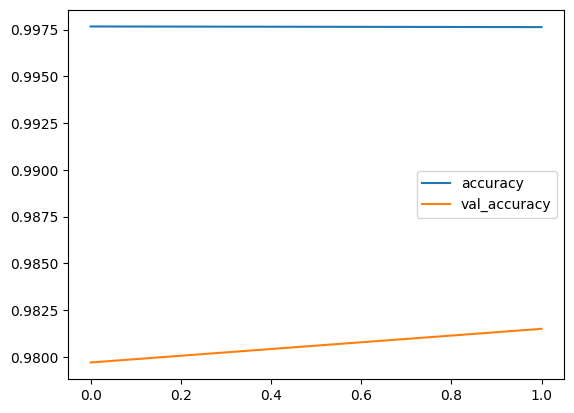

In [40]:
df[['accuracy', 'val_accuracy']].plot()

<Axes: >

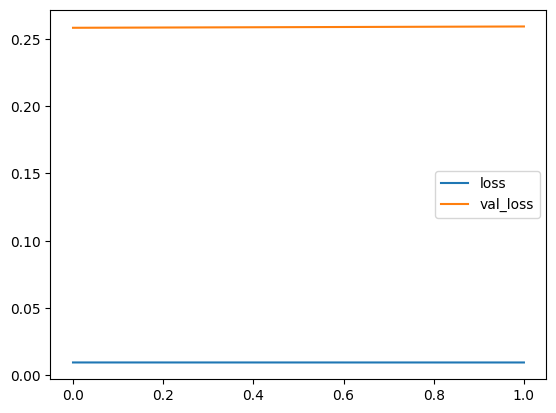

In [41]:
df[['loss', 'val_loss']].plot()


# Extending to CNNs

## One Conv-Layer

In [72]:
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Input
from tensorflow.keras.models import Sequential

model = Sequential([
    Input(shape=(28, 28,1)),
    Conv2D(6, 
           kernel_size=(5,5),
        ),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 24, 24, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 3456)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 120)            │       414,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 100)            │        12,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 428,106 (1.63 MB)

 Trainable params: 428,106 (1.63 MB)

 Non-trainable params: 0 (0.00 B)

In [73]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

In [74]:
hist = model.fit(x_train_norm, 
          y_train, 
          validation_data=(x_test_norm, y_test), 
          epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9018 - loss: 0.3187 - val_accuracy: 0.9642 - val_loss: 0.1090
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9709 - loss: 0.0940 - val_accuracy: 0.9726 - val_loss: 0.0912
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9802 - loss: 0.0646 - val_accuracy: 0.9731 - val_loss: 0.0859
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9844 - loss: 0.0486 - val_accuracy: 0.9765 - val_loss: 0.0848
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9872 - loss: 0.0389 - val_accuracy: 0.9759 - val_loss: 0.0883


## Two Conv-Layers + Max Pooling

In [105]:
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Input, MaxPool2D
from tensorflow.keras.models import Sequential

model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(6, kernel_size=(5,5), activation='relu'),
    MaxPool2D(),
    Conv2D(16, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 24, 24, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 12, 12, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 10, 10, 16)     │           880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 100)            │        12,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,266 (243.23 KB)

 Trainable params: 62,266 (243.23 KB)

 Non-trainable params: 0 (0.00 B)

In [106]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

In [107]:
hist = model.fit(x_train_norm, 
          y_train, 
          validation_data=(x_test_norm, y_test), 
          epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9008 - loss: 0.3258 - val_accuracy: 0.9842 - val_loss: 0.0502
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9821 - loss: 0.0552 - val_accuracy: 0.9861 - val_loss: 0.0440
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9873 - loss: 0.0404 - val_accuracy: 0.9852 - val_loss: 0.0470
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9900 - loss: 0.0304 - val_accuracy: 0.9885 - val_loss: 0.0370
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9927 - loss: 0.0229 - val_accuracy: 0.9897 - val_loss: 0.0356


In [108]:
import pandas as pd
df = pd.DataFrame(hist.history)

<Axes: >

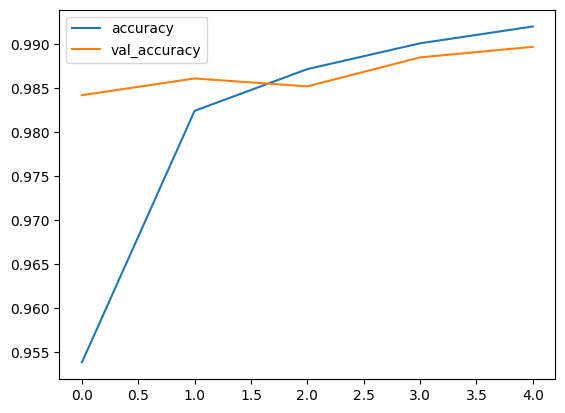

In [109]:
df[['accuracy', 'val_accuracy']].plot()

<Axes: >

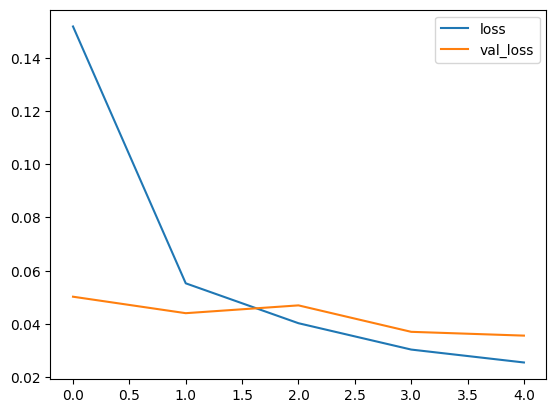

In [110]:
df[['loss', 'val_loss']].plot()

In [114]:
from tensorflow.keras import saving
saving.save_model(model, 'mnist_model.keras')

# Visualizing Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


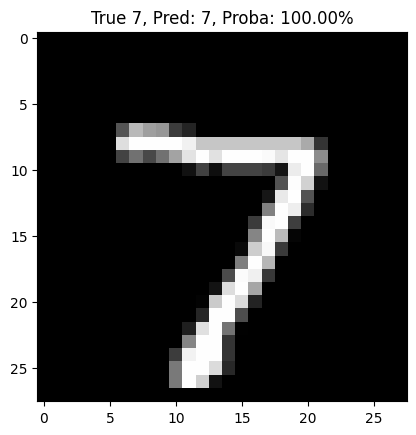

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


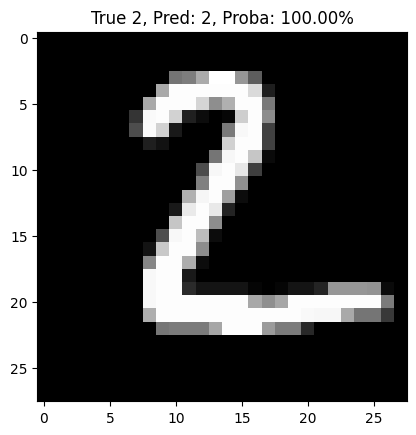

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


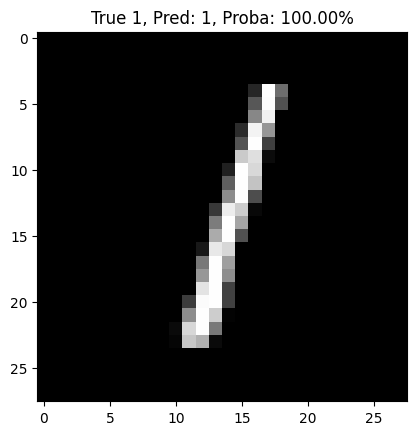

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


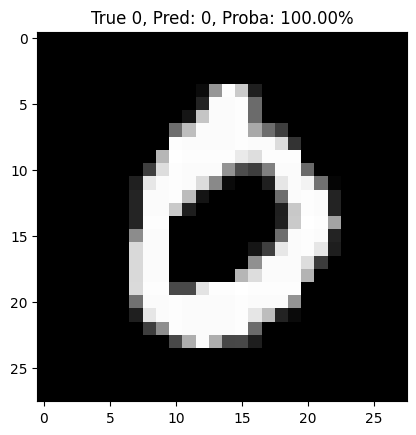

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


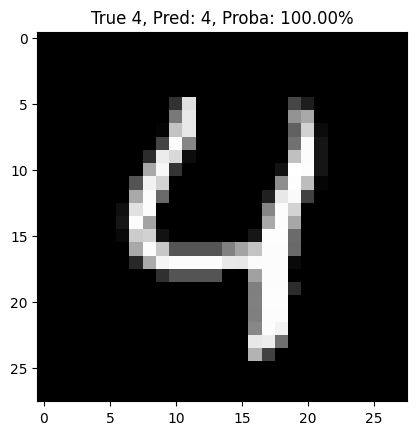

In [121]:
for idx in range(5):
    x=x_test_norm[idx].reshape(1, 28, 28, 1)
    plt.imshow(x.reshape(28, 28), cmap='gray')
    pred = model.predict(x)
    pred_class = pred.argmax()
    plt.title(f'True {y_test[idx]}, Pred: {pred_class}, Proba: {pred[0][pred_class]*100:.2f}%')
    plt.show()